In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

from tqdm import tqdm
from utils import *

color_list = plt.cm.Pastel1(np.arange(9))
set_seed(42)

nA = 2
nB = 2
nY = 1

figures_dir = f'figures/2v{nB}/'
print(figures_dir)


def plot_heatmap(y, x=None, title='temp', show=False, save=False):
    # 热图
    m, n = y.shape

    plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(y, cmap='Reds', origin='lower', vmin=-0.1, vmax=1.1)
    if (x is None):
        plt.xticks(np.arange(m), np.arange(m), fontsize=10)
        plt.yticks(np.arange(n), np.arange(m), fontsize=10)
    else:
        plt.xticks(np.arange(m), x, fontsize=10)
        plt.yticks(np.arange(n), x, fontsize=10)

    # 每个方格上标记数值
    for i in range(m):
        for j in range(n):
            plt.text(j, i, '{:.3f}'.format(y[i, j]), 
                     ha="center", va="center", color="black", fontsize=10)

    plt.title(title)

    if (save==True):
        plt.savefig(figures_dir + title + '.png')
    if (show==True):
        plt.show()
    plt.close()



def main():

    AT = np.array([0.1, 1, 10])
    ATs = np.array(list(itertools.product(AT, AT)))
    BTs = np.ones((3*3, nB))

    Ys_list = list(itertools.product([0, 1], repeat=9))
    Ys_pred_list = np.load(f'{nB}_Ys_pred_list.npy')

    loss_list = []

    for i in tqdm(range(len(Ys_list))):
        Ys = Ys_list[i]
        Ys_str = ''.join([str(i) for i in Ys])
        Ys_pred = Ys_pred_list[i]

        loss = mse(Ys, Ys_pred)
        # plot_heatmap(y=Ys_pred.reshape(3, 3), x=AT, title=Ys_str+f'_{loss:.3f}', show=False, save=True)

        loss_list.append(loss)

    loss_list = np.array(loss_list)

    count_list = []
    threshold_list = [0.005, 0.01, 0.02, 0.05, 0.1]
    for threshold in threshold_list:
        count_list.append(np.sum(loss_list<threshold))
    count_list = np.array(count_list)
    
    print('threshold', threshold_list)
    print('ratio', count_list / 512)
    
    plt.hist(loss_list, bins=np.arange(0, 0.3, 0.01), color=color_list[0])
    plt.xlabel('MSE')
    plt.ylabel('counts')
    plt.title('MSE_dist')
    #plt.savefig('MSE_dist.png')
    #plt.show()
    plt.close()

    data1.append(loss_list)
    data2.append(count_list)

figures/2v2/


In [3]:
data1 = []
data2 = []
for nB in [2,3,4,5,6]:
    main()
data1 = np.array(data1)
data2 = np.array(data2)/512

100%|██████████| 512/512 [00:00<00:00, 8825.47it/s]

threshold [0.005, 0.01, 0.02, 0.05, 0.1]
ratio [0.183594 0.275391 0.34375  0.402344 0.699219]



100%|██████████| 512/512 [00:00<00:00, 9140.80it/s]


threshold [0.005, 0.01, 0.02, 0.05, 0.1]
ratio [0.630859 0.708984 0.732422 0.775391 0.917969]


100%|██████████| 512/512 [00:00<00:00, 8980.44it/s]


threshold [0.005, 0.01, 0.02, 0.05, 0.1]
ratio [0.763672 0.837891 0.859375 0.886719 0.960938]


100%|██████████| 512/512 [00:00<00:00, 9140.87it/s]


threshold [0.005, 0.01, 0.02, 0.05, 0.1]
ratio [0.824219 0.869141 0.890625 0.935547 0.990234]


100%|██████████| 512/512 [00:00<00:00, 9307.06it/s]


threshold [0.005, 0.01, 0.02, 0.05, 0.1]
ratio [0.863281 0.919922 0.949219 0.996094 1.      ]


In [4]:
print(data1.shape)
print(data2.shape)

(5, 512)
(5, 5)


In [5]:
'''x = [2,3,4,5]
threshold_list = [0.005, 0.01, 0.02, 0.05, 0.1]

plt.figure(figsize=(8, 6))

plt.plot(x, data2[:, 0], label='mse<0.005', color=color_list[0])
plt.plot(x, data2[:, 1], label='mse<0.01', color=color_list[1])
plt.plot(x, data2[:, 2], label='mse<0.02', color=color_list[2])
plt.plot(x, data2[:, 3], label='mse<0.05', color=color_list[3])
plt.plot(x, data2[:, 4], label='mse<0.1', color=color_list[4])
plt.xticks([2,3,4,5])

plt.xlabel('receptor numbers')
plt.ylabel('ratio in 512 patterns')
plt.title('mse<threshold ratio')
plt.legend()

plt.show()'''

"x = [2,3,4,5]\nthreshold_list = [0.005, 0.01, 0.02, 0.05, 0.1]\n\nplt.figure(figsize=(8, 6))\n\nplt.plot(x, data2[:, 0], label='mse<0.005', color=color_list[0])\nplt.plot(x, data2[:, 1], label='mse<0.01', color=color_list[1])\nplt.plot(x, data2[:, 2], label='mse<0.02', color=color_list[2])\nplt.plot(x, data2[:, 3], label='mse<0.05', color=color_list[3])\nplt.plot(x, data2[:, 4], label='mse<0.1', color=color_list[4])\nplt.xticks([2,3,4,5])\n\nplt.xlabel('receptor numbers')\nplt.ylabel('ratio in 512 patterns')\nplt.title('mse<threshold ratio')\nplt.legend()\n\nplt.show()"

In [6]:
def main():

    AT = np.array([0.1, 1, 10])
    ATs = np.array(list(itertools.product(AT, AT)))
    BTs = np.ones((3*3, nB))

    Ys_list = list(itertools.product([0, 1], repeat=9))
    Ys_pred_list = np.load(f'MLP_{nB}_Ys_pred_list.npy')

    loss_list = []

    for i in tqdm(range(len(Ys_list))):
        Ys = Ys_list[i]
        Ys_str = ''.join([str(i) for i in Ys])
        Ys_pred = Ys_pred_list[i]

        loss = mse(Ys, Ys_pred)
        # plot_heatmap(y=Ys_pred.reshape(3, 3), x=AT, title=Ys_str+f'_{loss:.3f}', show=False, save=True)

        loss_list.append(loss)

    loss_list = np.array(loss_list)

    count_list = []
    threshold_list = [0.005, 0.01, 0.02, 0.05, 0.1]
    for threshold in threshold_list:
        count_list.append(np.sum(loss_list<threshold))
    count_list = np.array(count_list)
    
    print('threshold', threshold_list)
    print('ratio', count_list / 512)
    
    plt.hist(loss_list, bins=np.arange(0, 0.3, 0.01), color=color_list[0])
    plt.xlabel('MSE')
    plt.ylabel('counts')
    plt.title('MSE_dist')
    #plt.savefig('MSE_dist.png')
    #plt.show()
    plt.close()



    data3.append(loss_list)
    data4.append(count_list)

In [7]:
data3 = []
data4 = []
for nB in [2,3,4,5,6]:
    main()
data3 = np.array(data3)
data4 = np.array(data4)/512

100%|██████████| 512/512 [00:00<00:00, 8125.08it/s]


threshold [0.005, 0.01, 0.02, 0.05, 0.1]
ratio [0.113281 0.115234 0.115234 0.158203 0.472656]


100%|██████████| 512/512 [00:00<00:00, 8825.50it/s]


threshold [0.005, 0.01, 0.02, 0.05, 0.1]
ratio [0.273438 0.277344 0.28125  0.398438 0.763672]


100%|██████████| 512/512 [00:00<00:00, 9307.02it/s]


threshold [0.005, 0.01, 0.02, 0.05, 0.1]
ratio [0.470703 0.494141 0.519531 0.623047 0.90625 ]


100%|██████████| 512/512 [00:00<00:00, 8980.40it/s]


threshold [0.005, 0.01, 0.02, 0.05, 0.1]
ratio [0.666016 0.6875   0.699219 0.779297 0.976562]


100%|██████████| 512/512 [00:00<00:00, 9140.76it/s]


threshold [0.005, 0.01, 0.02, 0.05, 0.1]
ratio [0.796875 0.826172 0.845703 0.890625 0.990234]


In [8]:
data5 = np.concatenate([data1, data3])

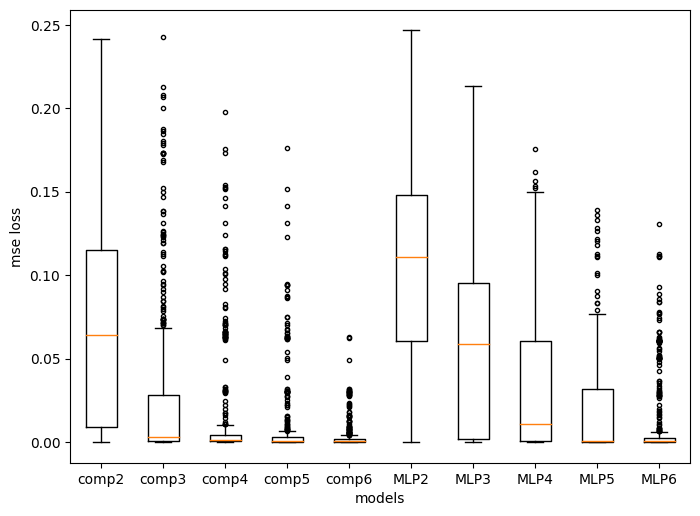

In [9]:
# rectangular box plot
plt.figure(figsize=(8, 6), dpi=100)
plt.boxplot(data5.T, sym='.', labels=['comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'MLP2', 'MLP3', 'MLP4', 'MLP5', 'MLP6'])
plt.xlabel('models')
plt.ylabel('mse loss')
plt.savefig('figures/boxplot.png')
plt.show()